In [8]:
pip install pandas matplotlib seaborn ipykernel

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración de estilo
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

# 1. Definir rutas (asumiendo que estás en la carpeta notebooks/)
DB_PATH = Path("../data/processed/enigh_unificada.db")

# 2. Conectar y Cargar
print("🔌 Conectando a la base de datos...")
conn = sqlite3.connect(DB_PATH)

# Leemos toda la tabla (¡Son ~500k filas, Pandas puede con eso!)
query = """
SELECT * FROM tabla_analitica_final 
WHERE edad BETWEEN 12 AND 24 -- Filtramos solo edad de interés escolar
"""
df = pd.read_sql(query, conn)
conn.close()

print(f"✅ Datos cargados: {df.shape[0]:,} filas, {df.shape[1]} columnas")
df.head()

🔌 Conectando a la base de datos...
✅ Datos cargados: 130,393 filas, 23 columnas


,folioviv,foliohog,numren,anio,sexo,edad,asis_esc,escolaridad_num,etnia,edo_conyug,ingreso_monetario,ingreso_laboral,ubica_geo,entidad,region,ambito,tot_integ,factor,edu_padre,edu_madre,premio_prepa_sec,premio_lic_prepa,tiene_internet
0,0100013602,1,03,2018,2,20,1,0,2,6,983.60,0.0,01001,01,Centro-norte,Urbano,None,NaN,5,4,1.290696,1.775864,1
1,0100013602,1,04,2018,1,16,1,0,2,6,147.54,0.0,01001,01,Centro-norte,Urbano,None,NaN,5,4,1.290696,1.775864,1
2,0100013602,1,05,2018,2,13,1,0,2,6,568.01,0.0,01001,01,Centro-norte,Urbano,None,NaN,5,4,1.290696,1.775864,1
3,0100026701,1,03,2018,1,16,1,0,2,6,0.00,0.0,01001,01,Centro-norte,Urbano,None,NaN,5,3,1.290696,1.775864,0
4,0100026701,1,04,2018,2,20,1,0,2,6,0.00,0.0,01001,01,Centro-norte,Urbano,None,NaN,5,3,1.290696,1.775864,0


In [3]:
# Mapeos para visualización
df['sexo_lbl'] = df['sexo'].map({1: 'Hombre', 2: 'Mujer'})
df['asiste_lbl'] = df['asis_esc'].map({1: 'Asiste', 2: 'No Asiste'})
df['ambito_lbl'] = df['ambito'] # Ya viene como texto (Rural/Urbano)
df['tiene_internet_lbl'] = df['tiene_internet'].map({1: 'Con Internet', 0: 'Sin Internet'})

# Crear grupos de edad para análisis
bins = [11, 14, 17, 22, 25]
labels = ['Secundaria (12-14)', 'Media Superior (15-17)', 'Superior (18-22)', 'Post (23-24)']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels)

print("Etiquetas generadas.")

Etiquetas generadas.


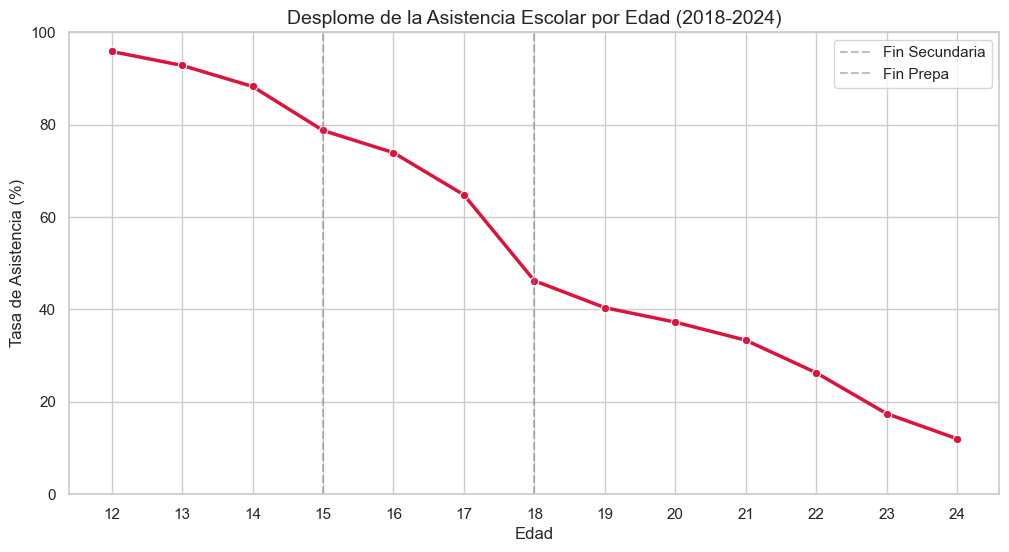

In [4]:
plt.figure(figsize=(12, 6))

# Calculamos tasa de asistencia por edad
tasa_asistencia = df.groupby('edad')['asis_esc'].apply(lambda x: (x == 1).mean() * 100).reset_index()

sns.lineplot(data=tasa_asistencia, x='edad', y='asis_esc', marker='o', linewidth=2.5, color='crimson')

plt.title('Desplome de la Asistencia Escolar por Edad (2018-2024)', fontsize=14)
plt.ylabel('Tasa de Asistencia (%)')
plt.xlabel('Edad')
plt.xticks(range(12, 25))
plt.ylim(0, 100)
plt.axvline(15, color='gray', linestyle='--', alpha=0.5, label='Fin Secundaria')
plt.axvline(18, color='gray', linestyle='--', alpha=0.5, label='Fin Prepa')
plt.legend()
plt.show()

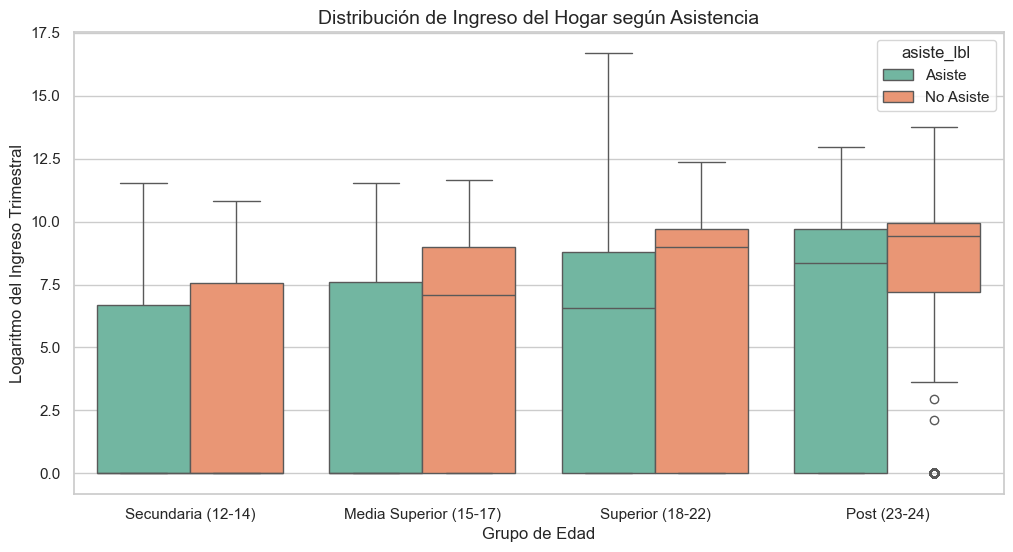

In [7]:
plt.figure(figsize=(12, 6))

# Usamos log del ingreso para visualizar mejor (evita que los millonarios rompan la escala)
df['log_ingreso'] = np.log1p(df['ingreso_monetario'])

sns.boxplot(data=df, x='grupo_edad', y='log_ingreso', hue='asiste_lbl', palette="Set2")

plt.title('Distribución de Ingreso del Hogar según Asistencia', fontsize=14)
plt.ylabel('Logaritmo del Ingreso Trimestral')
plt.xlabel('Grupo de Edad')
plt.show()

In [10]:
import sqlite3
import os

DB_PATH = 'enigh_unificada.db'

if not os.path.exists(DB_PATH):
    print(f"❌ El archivo {DB_PATH} no existe.")
else:
    conn = sqlite3.connect(DB_PATH)
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tablas = cursor.fetchall()
    conn.close()
    
    print("📊 Tablas encontradas en la base de datos:")
    for t in tablas:
        print(f" - {t[0]}")

❌ El archivo enigh_unificada.db no existe.
